# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.02.15

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220303-P_brain_M1_nonclear_adaptor


In [5]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

19800


# 0. fov parameters

In [6]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':[r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304',
                            r'\\10.245.74.212\Chromatin_NAS_2\20220316-P_brain_CTP11-12-13_from_0304'],
             'save_folder':r'\\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [12]:
_overwrite = False

_save_images = True

_fit_spots = True

sel_fov_ids = np.arange(20, 21) # batch1 in franklin

for _fov_id in sel_fov_ids:
    
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "combo_ref_id", 0)
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    try:
        fov._save_to_file('relabeled_combo')
    except:
        pass
    setattr(fov, "relabeled_combo_ref_id", 0)
    fov._process_image_to_spots('relabeled_combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    # 3. unique
    setattr(fov, "unique_ref_id", 0)
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov.parallel = False
    fov._save_to_file('relabeled_unique')
    setattr(fov, "relabeled_unique_ref_id", 0)
    fov._process_image_to_spots('relabeled_unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 57
- Number of field of views: 168
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 20
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C45_rep', 'H54C54', 'H55C55', 'H56C56', 'H57C57', 'H58C58', 'H59C59', 'H60C6

-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax  in 7.472s
-- removing hot pixels for channels:['488'] in 3.684s
-- illumination correction for channels: 488, in 1.246s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 12.786s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_020.hdf5
++ base attributes saved:['relabeled_unique_ref_im'] in 4.395s.
-- checking relabeled_unique, region:[3] in 0.016s.
+ Start sequential pre-processing for 1 images
++ processed relabeled_unique ids: [3] + batch process image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_020.dax for channels:['647']
- loading relabeled_unique info from file:Conv_zscan_020.hdf5 in 0.078s.
-- ['647'] images are required to process, [] images are loaded from save file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11

In [ ]:
_overwrite = False

_save_images = False

_fit_spots = True

#sel_fov_ids = np.arange(21, 81) # batch1 in franklin
sel_fov_ids = np.arange(0, 20) # batch1 in franklin

for _fov_id in sel_fov_ids:
    
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "combo_ref_id", 0)
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    try:
        fov._save_to_file('relabeled_combo')
    except:
        pass
    setattr(fov, "relabeled_combo_ref_id", 0)
    fov._process_image_to_spots('relabeled_combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    # 3. unique
    setattr(fov, "unique_ref_id", 0)
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov.parallel = False
    fov._save_to_file('relabeled_unique')
    setattr(fov, "relabeled_unique_ref_id", 0)
    fov._process_image_to_spots('relabeled_unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 57
- Number of field of views: 168
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 20
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C45_rep', 'H54C54', 'H55C55', 'H56C56', 'H57C57', 'H58C58', 'H59C59', 'H60C6

-- checking combo, region:[57 58 95] in 0.029s.
-- checking combo, region:[59 60 96] in 0.018s.
-- checking combo, region:[61 62 97] in 0.027s.
-- checking combo, region:[63 64 98] in 0.020s.
-- checking combo, region:[65 66 99] in 0.015s.
-- checking combo, region:[151 152 190] in 0.016s.
-- checking combo, region:[153 154 191] in 0.031s.
-- checking combo, region:[155 156 192] in 0.016s.
-- checking combo, region:[157 158 193] in 0.016s.
-- checking combo, region:[159 160 194] in 0.031s.
-- checking combo, region:[161 162 195] in 0.016s.
-- checking combo, region:[163 164] in 0.031s.
-- checking combo, region:[103 104 166] in 0.016s.
-- checking combo, region:[105 106 167] in 0.015s.
-- checking combo, region:[107 108 168] in 0.016s.
-- checking combo, region:[109 110 169] in 0.031s.
-- checking combo, region:[111 112 170] in 0.032s.
-- checking combo, region:[113 114 171] in 0.016s.
-- checking combo, region:[115 116 172] in 0.016s.
-- checking combo, region:[117 118 173] in 0.030s.

-- drift 7: [-0.36 15.73 44.59] in 2.796s.
-- return a sub-optimal drift
--- finish drift: [-0.16  5.35 14.96] in 22.787s
-- generate translation function for chromatic correction for channels: [] and drift:[-0.16  5.35 14.96] in 0.000s
-- finish correction in 65.947s
-- start fitting spots in channel:647, 468 seeded with th=800, 468 fitted in 58.794s.
- writting relabeled_unique spots into file:\\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_000.hdf5
-- updated spots for id:[3] in 0.031s
in 126.20s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_000.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_000.dax 

-- finish correction in 18.628s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_001.hdf5
++ base attributes saved:['combo_ref_im'] in 5.351s.
-- checking combo, region:[ 1  2 67] in 0.031s.
-- checking combo, region:[101 102 165] in 0.016s.
-- checking combo, region:[ 3  4 68] in 0.031s.
-- checking combo, region:[ 5  6 69] in 0.031s.
-- checking combo, region:[ 7  8 70] in 0.016s.
-- checking combo, region:[ 9 10 71] in 0.016s.
-- checking combo, region:[11 12 72] in 0.016s.
-- checking combo, region:[13 14 73] in 0.016s.
-- checking combo, region:[15 16 74] in 0.029s.
-- checking combo, region:[17 18 75] in 0.016s.
-- checking combo, region:[19 20 76] in 0.031s.
-- checking combo, region:[21 22 77] in 0.016s.
-- checking combo, region:[23 24 78] in 0.031s.
-- checking combo, region:[25 26 79] in 0.015s.
-- checking combo, region:[27 28 80] in 0.016s.
-- checking combo, region:[29 30 81] in 0.031s.
-- checking combo, region:[31 3

-- finish correction in 14.742s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_001.hdf5
++ base attributes saved:['relabeled_unique_ref_im'] in 5.128s.
-- checking relabeled_unique, region:[3] in 0.016s.
+ Start sequential pre-processing for 1 images
++ processed relabeled_unique ids: [3] + batch process image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_001.dax for channels:['647']
- loading relabeled_unique info from file:Conv_zscan_001.hdf5 in 0.125s.
-- ['647'] images are required to process, [] images are loaded from save file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_001.hdf5
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_001.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_001.dax  in 6.829s
-- remo

-- folders not selected, allow processing all 77 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_002.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_002.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_002.dax  in 6.142s
-- removing hot pixels for channels:['488'] in 5.095s
-- illumination correction for channels: 488, in 1.585s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 13.253s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_002.hdf5
++ base attributes saved:['combo_ref_im'] in 5.300s.
-- checking combo, region:[ 1  2 67] in 0.031s.
-- checking combo, region:

-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_002.dax  in 8.052s
-- removing hot pixels for channels:['488'] in 4.687s
-- illumination correction for channels: 488, in 1.671s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.853s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_002.hdf5
++ base attributes saved:['relabeled_unique_ref_im'] in 5.271s.
-- checking relabeled_unique, region:[3] in 0.016s.
+ Start sequential pre-processing for 1 images
++ processed relabeled_unique ids: [3] + batch process image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_002.dax for channels:['647']
- loading relabeled_unique info from file:Conv_zscan_002.hdf5 in 0.125s.
-- ['647'] images are required to process, [] images are loaded from save file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11

-- saving 750_647_561_bleed profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_003.hdf5.
dict_keys(['combo', 'unique', 'relabeled_combo', 'relabeled_unique'])
save type: combo"
-- saving combo to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_003.hdf5
--- combo attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.013s.
save type: unique"
-- saving unique to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_003.hdf5
--- unique attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.012s.
save type: relabeled_combo"
-- saving relabeled_combo to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_003.hdf5
--- relabeled_combo attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.012s.
save type: relabeled_unique"
-- saving relabeled_uniq

-- removing hot pixels for channels:['488'] in 4.616s
-- illumination correction for channels: 488, in 1.647s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 12.101s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_003.hdf5
++ base attributes saved:['unique_ref_im'] in 5.196s.
-- checking unique, region:[1 2 3] in 0.016s.
-- checking unique, region:[4 5 6] in 0.031s.
-- checking unique, region:[7 8 9] in 0.016s.
-- checking unique, region:[10 11 12] in 0.031s.
-- checking unique, region:[13 14 15] in 0.016s.
-- checking unique, region:[16 17 18] in 0.031s.
-- checking unique, region:[19 20 21] in 0.016s.
-- checking unique, region:[22 23 24] in 0.016s.
-- checking unique, region:[25 26 27] in 0.036s.
-- checking unique, region:[28] in 0.016s.
+ Start multi-processing of pre-processing for 10 images with 16 threads
++ processing unique ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 

-- saving 488_illumination profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_004.hdf5.
-- saving 405_illumination profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_004.hdf5.
-- saving 750_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_004.hdf5.
-- saving 647_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_004.hdf5.
-- saving 561_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_004.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_004.hdf5.
-- 647_chromatic_constants profile already exist in save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\C

-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_004.dax  in 7.962s
-- removing hot pixels for channels:['488'] in 4.810s
-- illumination correction for channels: 488, in 1.540s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.823s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_004.hdf5
++ base attributes saved:['relabeled_combo_ref_im'] in 5.257s.
-- checking relabeled_combo, region:[175 168] in 0.031s.
-- checking relabeled_combo, region:[179 176] in 0.016s.
+ Start multi-processing of pre-processing for 2 images with 16 threads
++ processing relabeled_combo ids: [168 175 176 179] , finish in 465.19s.
-- folders not selected, allow processing all 77 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_004.dax
- correct the whole fov for image: \

	 488 illumination_correction_488_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_005.dax: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_005.hdf5.
* create savefile: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_005.hdf5
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_005.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 0.038s.
-- saving segmentatio

+ Start multi-processing of pre-processing for 65 images with 16 threads
++ processing combo ids: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195] , finish in 6150.39s.
-- saving relabeled_combo to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_fr

- 77 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy


-- checking combo, region:[127 128 178] in 0.021s.
-- checking combo, region:[129 130 179] in 0.025s.
-- checking combo, region:[131 132 180] in 0.024s.
-- checking combo, region:[133 134 181] in 0.023s.
-- checking combo, region:[135 136 182] in 0.020s.
-- checking combo, region:[137 138 183] in 0.012s.
-- checking combo, region:[139 140 184] in 0.030s.
-- checking combo, region:[141 142 185] in 0.017s.
-- checking combo, region:[143 144 186] in 0.016s.
-- checking combo, region:[145 146 187] in 0.030s.
-- checking combo, region:[147 148 188] in 0.026s.
-- checking combo, region:[149 150 189] in 0.021s.
+ Start multi-processing of pre-processing for 65 images with 16 threads
++ processing combo ids: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  7

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 57
- Number of field of views: 168
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 20
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C45_rep', 'H54C54', 'H55C55', 'H56C56', 'H57C57', 'H58C58', 'H59C59', 'H60C6

-- checking combo, region:[57 58 95] in 0.026s.
-- checking combo, region:[59 60 96] in 0.021s.
-- checking combo, region:[61 62 97] in 0.020s.
-- checking combo, region:[63 64 98] in 0.027s.
-- checking combo, region:[65 66 99] in 0.016s.
-- checking combo, region:[151 152 190] in 0.016s.
-- checking combo, region:[153 154 191] in 0.016s.
-- checking combo, region:[155 156 192] in 0.031s.
-- checking combo, region:[157 158 193] in 0.016s.
-- checking combo, region:[159 160 194] in 0.031s.
-- checking combo, region:[161 162 195] in 0.019s.
-- checking combo, region:[163 164] in 0.016s.
-- checking combo, region:[103 104 166] in 0.012s.
-- checking combo, region:[105 106 167] in 0.032s.
-- checking combo, region:[107 108 168] in 0.016s.
-- checking combo, region:[109 110 169] in 0.014s.
-- checking combo, region:[111 112 170] in 0.031s.
-- checking combo, region:[113 114 171] in 0.016s.
-- checking combo, region:[115 116 172] in 0.031s.
-- checking combo, region:[117 118 173] in 0.016s.

-- finish correction in 53.955s
-- start fitting spots in channel:647, 351 seeded with th=800, 351 fitted in 50.406s.
- writting relabeled_unique spots into file:\\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_007.hdf5
-- updated spots for id:[3] in 0.031s
in 105.59s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_007.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_007.dax  in 3.468s
-- removing hot pixels for channels:['405'] in 4.923s
-- illumination correction for channels: 405, in 1.546s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.441s
-- saving fov_info to file: \\franklin

-- checking combo, region:[ 1  2 67] in 0.016s.
-- checking combo, region:[101 102 165] in 0.032s.
-- checking combo, region:[ 3  4 68] in 0.031s.
-- checking combo, region:[ 5  6 69] in 0.016s.
-- checking combo, region:[ 7  8 70] in 0.016s.
-- checking combo, region:[ 9 10 71] in 0.031s.
-- checking combo, region:[11 12 72] in 0.016s.
-- checking combo, region:[13 14 73] in 0.031s.
-- checking combo, region:[15 16 74] in 0.032s.
-- checking combo, region:[17 18 75] in 0.017s.
-- checking combo, region:[19 20 76] in 0.014s.
-- checking combo, region:[21 22 77] in 0.036s.
-- checking combo, region:[23 24 78] in 0.011s.
-- checking combo, region:[25 26 79] in 0.031s.
-- checking combo, region:[27 28 80] in 0.016s.
-- checking combo, region:[29 30 81] in 0.016s.
-- checking combo, region:[31 32 82] in 0.031s.
-- checking combo, region:[33 34 83] in 0.016s.
-- checking combo, region:[35 36 84] in 0.030s.
-- checking combo, region:[37 38 85] in 0.017s.
-- checking combo, region:[39 40 86] 

-- checking relabeled_unique, region:[3] in 0.016s.
+ Start sequential pre-processing for 1 images
++ processed relabeled_unique ids: [3] + batch process image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_008.dax for channels:['647']
- loading relabeled_unique info from file:Conv_zscan_008.hdf5 in 0.109s.
-- ['647'] images are required to process, [] images are loaded from save file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_008.hdf5
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_008.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_008.dax  in 9.093s
-- removing hot pixels for channels:['750', '647', '561', '488'] in 19.641s
-- bleedthrough correction for channels: ['750', '647', '561'] in 11.235s
-- illumination correction for channels: 750, 647, 561, 488, in 6.

-- folders not selected, allow processing all 77 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_009.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_009.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_009.dax  in 6.983s
-- removing hot pixels for channels:['488'] in 5.094s
-- illumination correction for channels: 488, in 1.531s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.047s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_009.hdf5
++ base attributes saved:['combo_ref_im'] in 5.161s.
-- checking combo, region:[ 1  2 67] in 0.016s.
-- checking combo, region:

-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_009.dax  in 8.016s
-- removing hot pixels for channels:['488'] in 4.906s
-- illumination correction for channels: 488, in 1.562s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.969s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_009.hdf5
++ base attributes saved:['relabeled_unique_ref_im'] in 5.422s.
-- checking relabeled_unique, region:[3] in 0.016s.
+ Start sequential pre-processing for 1 images
++ processed relabeled_unique ids: [3] + batch process image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H76U10\Conv_zscan_009.dax for channels:['647']
- loading relabeled_unique info from file:Conv_zscan_009.hdf5 in 0.111s.
-- ['647'] images are required to process, [] images are loaded from save file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11

-- saving 750_647_561_bleed profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_010.hdf5.
dict_keys(['combo', 'unique', 'relabeled_combo', 'relabeled_unique'])
save type: combo"
-- saving combo to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_010.hdf5
--- combo attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
save type: unique"
-- saving unique to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_010.hdf5
--- unique attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.016s.
save type: relabeled_combo"
-- saving relabeled_combo to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_010.hdf5
--- relabeled_combo attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.016s.
save type: relabeled_unique"
-- saving relabeled_uniq

-- removing hot pixels for channels:['488'] in 4.734s
-- illumination correction for channels: 488, in 1.672s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.655s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_010.hdf5
++ base attributes saved:['unique_ref_im'] in 5.281s.
-- checking unique, region:[1 2 3] in 0.029s.
-- checking unique, region:[4 5 6] in 0.018s.
-- checking unique, region:[7 8 9] in 0.031s.
-- checking unique, region:[10 11 12] in 0.016s.
-- checking unique, region:[13 14 15] in 0.031s.
-- checking unique, region:[16 17 18] in 0.016s.
-- checking unique, region:[19 20 21] in 0.031s.
-- checking unique, region:[22 23 24] in 0.016s.
-- checking unique, region:[25 26 27] in 0.031s.
-- checking unique, region:[28] in 0.016s.
+ Start multi-processing of pre-processing for 10 images with 16 threads
++ processing unique ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 

-- saving 750_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_011.hdf5.
-- saving 647_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_011.hdf5.
-- saving 561_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_011.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_011.hdf5.
-- 647_chromatic_constants profile already exist in save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_011.hdf5, skip.
-- saving 561_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_011.hdf5.
-- saving 750_647_561_bleed profile to 

++ base attributes saved:['relabeled_combo_ref_im'] in 5.293s.
-- checking relabeled_combo, region:[175 168] in 0.031s.
-- checking relabeled_combo, region:[179 176] in 0.016s.
+ Start multi-processing of pre-processing for 2 images with 16 threads
++ processing relabeled_combo ids: [168 175 176 179] , finish in 587.72s.
-- folders not selected, allow processing all 77 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_011.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_011.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_011.dax  in 4.266s
-- removing hot pixels for channels:['488'] in 4.844s
-- illumination correction for channels: 488, in 1.547s
-- -- generate tr

-- saving correction to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_012.hdf5
-- saving 750_illumination profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_012.hdf5.
-- saving 647_illumination profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_012.hdf5.
-- saving 561_illumination profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_012.hdf5.
-- saving 488_illumination profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_012.hdf5.
-- saving 405_illumination profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_012.hdf5.
-- saving 750_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_012.hdf5.
-- saving 647_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\202203

-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_012.dax  in 7.735s
-- removing hot pixels for channels:['488'] in 4.703s
-- illumination correction for channels: 488, in 1.625s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.547s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_012.hdf5
++ base attributes saved:['relabeled_combo_ref_im'] in 5.342s.
-- checking relabeled_combo, region:[175 168] in 0.032s.
-- checking relabeled_combo, region:[179 176] in 0.015s.
+ Start multi-processing of pre-processing for 2 images with 16 threads
++ processing relabeled_combo ids: [168 175 176 179] , finish in 498.46s.
-- folders not selected, allow processing all 77 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_012.dax
- correct the whole fov for image: \

	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_013.dax: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_013.hdf5.
* create savefile: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_013.hdf5
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_013.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'se

-- checking combo, region:[147 148 188] in 0.032s.
-- checking combo, region:[149 150 189] in 0.016s.
+ Start multi-processing of pre-processing for 65 images with 16 threads
++ processing combo ids: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195] , finish in 

- 77 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy


-- checking combo, region:[115 116 172] in 0.028s.
-- checking combo, region:[117 118 173] in 0.016s.
-- checking combo, region:[119 120 174] in 0.034s.
-- checking combo, region:[121 122 175] in 0.016s.
-- checking combo, region:[123 124 176] in 0.016s.
-- checking combo, region:[125 126 177] in 0.031s.
-- checking combo, region:[127 128 178] in 0.172s.
-- checking combo, region:[129 130 179] in 0.031s.
-- checking combo, region:[131 132 180] in 0.016s.
-- checking combo, region:[133 134 181] in 0.017s.
-- checking combo, region:[135 136 182] in 0.030s.
-- checking combo, region:[137 138 183] in 0.016s.
-- checking combo, region:[139 140 184] in 0.016s.
-- checking combo, region:[141 142 185] in 0.031s.
-- checking combo, region:[143 144 186] in 0.016s.
-- checking combo, region:[145 146 187] in 0.016s.
-- checking combo, region:[147 148 188] in 0.025s.
-- checking combo, region:[149 150 189] in 0.016s.
+ Start multi-processing of pre-processing for 65 images with 16 threads
++ proces

-- removing hot pixels for channels:['405'] in 4.750s
-- illumination correction for channels: 405, in 1.672s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.619s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_014.hdf5
++ base attributes saved:['dapi_im'] in 5.367s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 57
- Number of field of views: 168
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 20
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', '

-- checking combo, region:[35 36 84] in 0.028s.
-- checking combo, region:[37 38 85] in 0.019s.
-- checking combo, region:[39 40 86] in 0.026s.
-- checking combo, region:[41 42 87] in 0.020s.
-- checking combo, region:[43 44 88] in 0.016s.
-- checking combo, region:[45 46 89] in 0.016s.
-- checking combo, region:[47 48 90] in 0.016s.
-- checking combo, region:[49 50 91] in 0.031s.
-- checking combo, region:[51 52 92] in 0.016s.
-- checking combo, region:[53 54 93] in 0.031s.
-- checking combo, region:[55 56 94] in 0.027s.
-- checking combo, region:[57 58 95] in 0.021s.
-- checking combo, region:[59 60 96] in 0.022s.
-- checking combo, region:[61 62 97] in 0.021s.
-- checking combo, region:[63 64 98] in 0.018s.
-- checking combo, region:[65 66 99] in 0.016s.
-- checking combo, region:[151 152 190] in 0.031s.
-- checking combo, region:[153 154 191] in 0.016s.
-- checking combo, region:[155 156 192] in 0.016s.
-- checking combo, region:[157 158 193] in 0.031s.
-- checking combo, region:[1

-- removing hot pixels for channels:['750', '647', '561', '488'] in 19.375s
-- bleedthrough correction for channels: ['750', '647', '561'] in 11.188s
-- illumination correction for channels: 750, 647, 561, 488, in 6.312s
-- apply bead_drift calculate for channel: 488
-- start aligning given source image to given reference image.
-- drift 0: [-0.31 10.   45.38] in 2.938s.
-- drift 1: [-0.12  9.94 45.43] in 2.825s.
-- drift 2: [-0.34  9.95 45.53] in 2.766s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.26  9.96 45.45] in 8.860s
-- generate translation function for chromatic correction for channels: [] and drift:[-0.26  9.96 45.45] in 0.000s
-- finish correction in 50.657s
-- start fitting spots in channel:647, 309 seeded with th=800, 309 fitted in 53.203s.
- writting relabeled_unique spots into file:\\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_015.hdf5
-- updated spots for id:[3] in 0.029s
in 105.41s.
-- choose dapi image

-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_016.dax  in 11.810s
-- removing hot pixels for channels:['488'] in 6.641s
-- illumination correction for channels: 488, in 1.594s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 20.469s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_016.hdf5
++ base attributes saved:['combo_ref_im'] in 6.553s.
-- checking combo, region:[ 1  2 67] in 9.453s.
-- checking combo, region:[101 102 165] in 0.060s.
-- checking combo, region:[ 3  4 68] in 0.033s.
-- checking combo, region:[ 5  6 69] in 0.047s.
-- checking combo, region:[ 7  8 70] in 0.016s.
-- checking combo, region:[ 9 10 71] in 0.041s.
-- checking combo, region:[11 12 72] in 0.022s.
-- checking combo, region:[13 14 73] in 0.031s.
-- checking combo, region:[15 16 74] in 0.016s.
-- checking combo, region:[17 18 75] in 0.046s.
-- chec

In [17]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])

with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    sel_ims = []
    sel_raw_spots = []
    for _id in sel_ids:
        _ind = _ids.index(_id)
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

In [19]:
coord_dict = {
    'coords': [],#np.fliplr(sel_spots[:,1:4]),
    'class_ids': [],#sel_ids,
}

for _i, _spots in enumerate(sel_raw_spots):
    _spots = _spots[_spots[:,0]>0]
    if len(_spots) > 0:
        coord_dict['coords'].extend(list(np.fliplr(_spots[:,1:4])))
        #coord_dict['coords'].extend(list(np.fliplr(_crop.crop_coords(_spots.to_coords()[_sel_inds]))))
        coord_dict['class_ids'].extend(list(np.ones(len(_spots),dtype=np.int32) * _i))
    

<IPython.core.display.Javascript object>


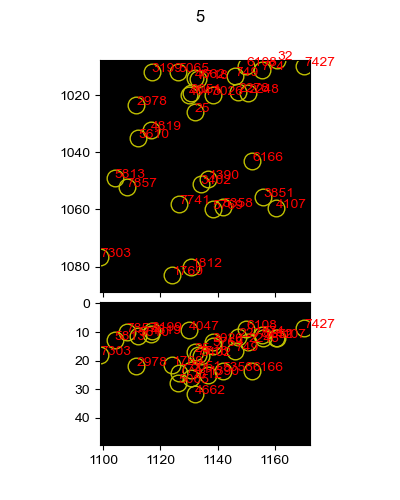

In [20]:
visual_tools.imshow_mark_3d_v2(sel_ims, given_dic=coord_dict, image_names=sel_ids)